In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math
from sklearn.cluster import MiniBatchKMeans,KMeans

In [75]:
auto_prices=pd.read_csv('F:\人工智能\聚类专题-配套资料\code\工业汽车数据集应用实践\Automobile price data _Raw_.csv')
auto_prices.head(20)
Auto_Data=pd.read_csv('F:\人工智能\聚类专题-配套资料\code\工业汽车数据集应用实践\Auto_Data_Features.csv')

In [5]:
auto_prices.columns=[i.replace('-','_') for i in auto_prices.columns]

In [6]:
(auto_prices.astype(np.object)=='?').any()

symboling            False
normalized_losses     True
make                 False
fuel_type            False
aspiration           False
num_of_doors          True
body_style           False
drive_wheels         False
engine_location      False
wheel_base           False
length               False
width                False
height               False
curb_weight          False
engine_type          False
num_of_cylinders     False
engine_size          False
fuel_system          False
bore                  True
stroke                True
compression_ratio    False
horsepower            True
peak_rpm              True
city_mpg             False
highway_mpg          False
price                 True
dtype: bool

In [7]:
auto_prices.dtypes

symboling              int64
normalized_losses     object
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                  object
stroke                object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
dtype: object

In [12]:
for col in auto_prices.columns:
    if auto_prices[col].dtype==object:
        for i in auto_prices[col]:
            if i=='?':
                count=count+1
                
    
        print(col+' '+str(count))
        count=0

normalized_losses 41
make 0
fuel_type 0
aspiration 0
num_of_doors 2
body_style 0
drive_wheels 0
engine_location 0
engine_type 0
num_of_cylinders 0
fuel_system 0
bore 4
stroke 4
horsepower 2
peak_rpm 2
price 4


In [17]:
auto_prices

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [21]:
cols=['price','bore','stroke','horsepower','peak_rpm']
for a in cols:
    auto_prices.loc[auto_prices[a]=='?',a]=np.nan

In [22]:
auto_prices

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [37]:
auto_prices.dropna(axis=0,inplace=True)
auto_prices.shape

AttributeError: 'tuple' object has no attribute 'reshape'

In [24]:
for a in cols:
    auto_prices[a]=pd.to_numeric(auto_prices[a])
auto_prices[cols].dtypes

price           int64
bore          float64
stroke        float64
horsepower      int64
peak_rpm        int64
dtype: object

In [25]:
auto_prices['num_of_cylinders']

0      four
1      four
2       six
3      four
4      five
       ... 
200    four
201    four
202     six
203     six
204    four
Name: num_of_cylinders, Length: 195, dtype: object

In [26]:
auto_prices['num_of_cylinders'].value_counts()

four      155
six        24
five       10
eight       4
three       1
twelve      1
Name: num_of_cylinders, dtype: int64

In [27]:
cylinder_categories={'three':'three_four','four':'three_four',
                    'five':'five_six','six':'five_six',
                    'eight':'eight_twelve','twelve':'eight_twelve'}
auto_prices['num_of_cylinders']=[cylinder_categories[x] for x in auto_prices['num_of_cylinders']]
auto_prices['num_of_cylinders'].value_counts()

three_four      156
five_six         34
eight_twelve      5
Name: num_of_cylinders, dtype: int64

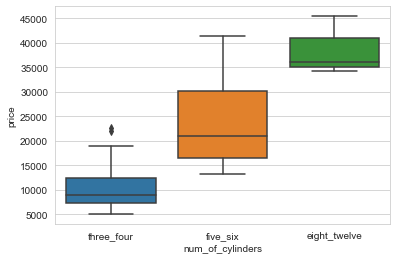

In [43]:
def plot_box(auto_price,col,col_y='price'):
    sns.set_style('whitegrid')
    sns.boxplot(col,col_y,data=auto_price)
    plt.xlabel(col)
    plt.ylabel(col_y)
    plt.show()

plot_box(auto_prices,'num_of_cylinders')

In [46]:
auto_prices['body_style'].value_counts()

sedan          94
hatchback      63
wagon          24
hardtop         8
convertible     6
Name: body_style, dtype: int64

In [48]:
fenlei={'sedan':'sedan','hatchback':'hatchback','wagon':'wagon','hardtop':'hardtop_convert','convertible':'hardtop_convert'}
auto_prices['body_style']=[fenlei[a] for a in auto_prices['body_style']]
auto_prices['body_style'].value_counts()

sedan              94
hatchback          63
wagon              24
hardtop_convert    14
Name: body_style, dtype: int64

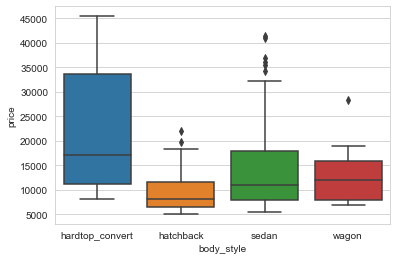

In [50]:
def box_plot(auto_price,col,col_y='price'):
    sns.boxplot(col,col_y,data=auto_price)
    plt.show()
box_plot(auto_prices,auto_prices['body_style'])

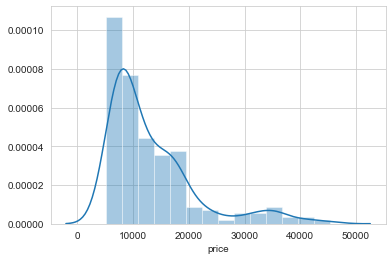

In [51]:
def hist_plot(val):
    sns.distplot(val)
    plt.show()
hist_plot(auto_prices['price'])

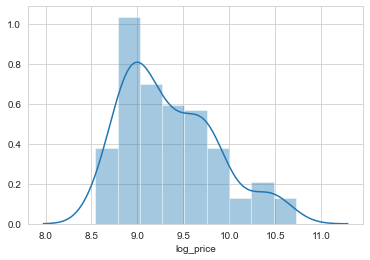

In [52]:
auto_prices['log_price']=np.log(auto_prices['price'])
hist_plot(auto_prices['log_price'])

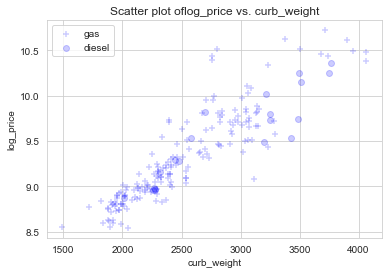

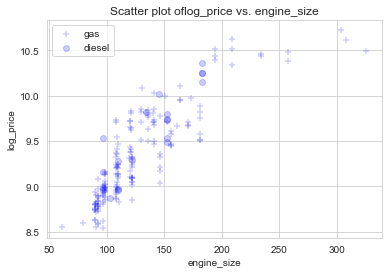

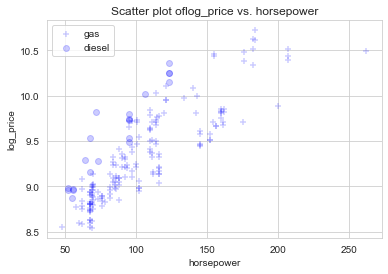

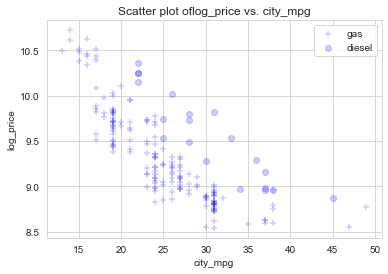

In [68]:
def plot_scatter_shape(auto_prices,cols,shape_col='fuel_type',col_y='log_price',alpha=0.2):
    shapes=['+','o','s','x','^']
    unique_cats=auto_prices[shape_col].unique()
    for col in cols:
        sns.set_style('whitegrid')
        for i,cat in enumerate(unique_cats):
            temp=auto_prices[auto_prices[shape_col]==cat]
            sns.regplot(col,col_y,data=temp,marker=shapes[i],label=cat,
                       scatter_kws={'alpha':alpha},fit_reg=False,color='blue')
        plt.title('Scatter plot of'+col_y+' vs. '+col)
        plt.xlabel(col)
        plt.ylabel(col_y)
        plt.legend()
        plt.show()
num_cols=['curb_weight','engine_size','horsepower','city_mpg']
plot_scatter_shape(auto_prices,num_cols)

In [76]:
nr.seed(2233)
col_dic={0:'blue',1:'green',2:'orange',3:'gray',4:'magenta',5:'black'}
kmeans_2=KMeans(n_clusters=2,random_state=0)
assignments_km2=kmeans_2.fit_predict(Auto_Data)
assign_color_km2=[col_dic[x] for x in assignments_km2]

KeyError: 'city_mpg'

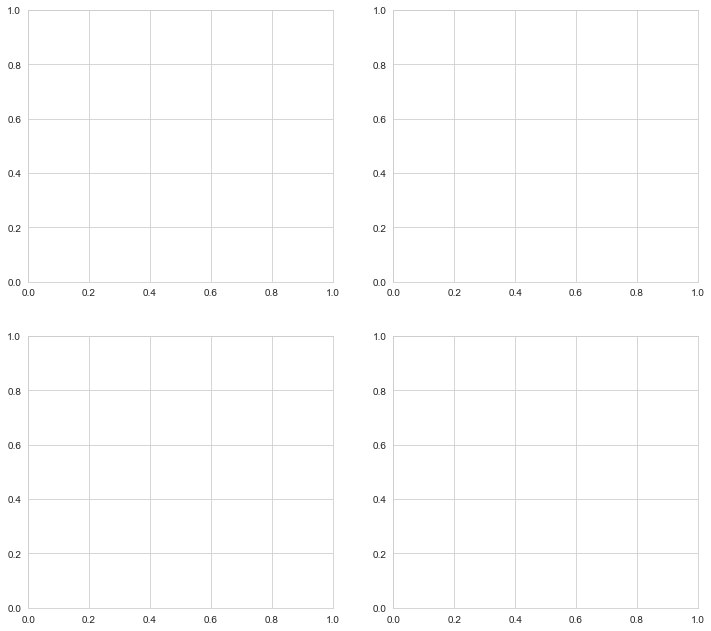

In [82]:
def plot_auto_cluster(auto_prices,assign_color,markers):
    fig,ax=plt.subplots(2,2,figsize=(12,11))
    x_cols=['city_mpg','curb_weight','curb_weight','horsepower']
    y_cols=['price','price','city_mpg','price']
    for x_col,y_col,i,j in zip(x_cols,y_cols,[0,0,1,1],[0,1,0,1]):
        for x,y,c,m in zip(auto_prices[x_col],auto_prices[y_col],assign_color,markers):
            ax[i,j].scatter(x,y,color=c,markers=m)
        ax[i,j].set_title('Scatter plot of '+y_col+' vs. '+x_col)
        ax[i,j].set_xlabel(x_col)
        ax[i,j].set_ylabel(y_col)
    plt.show()
shapes=['+','o','s','x','^']
plot_auto_cluster(auto_prices,assign_color_km2,shapes)